###Stock and Revenue Analysis: Tesla vs GameStop

## Introduction

In this project, we analyze historical stock price data of Tesla and GameStop, and visualize their trends over time using line graphs. We also extract Tesla's revenue data through web scraping for better insights.


## Importing Required Libraries

Below are the necessary libraries for data analysis, plotting, and scraping.


##*Extracting* Tesla Stock Data Using yfinance

In this step, we use the `yfinance` Python library to download Tesla's historical stock data.
We reset the index so that the date becomes a regular column, and then we display the first five rows of the dataset.
This helps us verify the structure and correctness of the data before moving forward.


In [18]:
!pip install yfinance

## Step 1: Download Tesla Stock Data

We use the `yfinance` library to download Tesla's historical stock data.


In [21]:
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max").reset_index()

In [23]:
from google.colab import files
uploaded = files.upload()

Saving TSLA.csv to TSLA (1).csv


In [25]:
tesla_revenue = pd.read_csv('TSLA.csv')

In [28]:
tesla_revenue.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [29]:
tesla_revenue.rename(columns={'Value': 'Revenue'}, inplace=True)

In [30]:
tesla_revenue.rename(columns={'Revenue (USD)': 'Revenue'}, inplace=True)

In [37]:
tesla_revenue.head()

""


In [33]:
# Import necessary libraries
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt


# Extract Tesla stock data
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)

# Display first 5 rows
tesla_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


###Extracting Tesla Revenue Data Using Web Scraping


In this step, we perform web scraping using the `requests` and `BeautifulSoup` libraries to extract Tesla's quarterly revenue data from Macrotrends.
We locate the correct HTML table containing the revenue, clean the data, and display the last five rows of the resulting DataFrame to verify the output.


In [34]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Fetch the HTML content
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
res = requests.get(url)
soup = BeautifulSoup(res.content, "html.parser")

# Use CSS selector to locate the revenue table rows
rows = soup.select('#style-1 div + div .historical_data_table tr')[1:]  # skip header row

data = []
for row in rows:
    cols = row.find_all('td')
    if len(cols) == 2:
        date = cols[0].text.strip()
        rev = cols[1].text.strip().replace('$','').replace(',','')
        data.append({"Date": date, "Revenue": rev})

# Create DataFrame
tesla_revenue = pd.DataFrame(data)
tesla_revenue.tail()


""


###Extracting GameStop Stock Data Using yfinance

###In this step, we’ll use the `yfinance` library to download historical stock price data for GameStop (GME).
We’ll reset the index and display the first five rows of the resulting DataFrame to confirm that data has been extracted correctly.


In [14]:
import yfinance as yf

# Download GME stock data
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")

# Reset index to convert Date to a column
gme_data.reset_index(inplace=True)

# Display the first five rows
gme_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693349,1.603295,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662209,1.603296,1.662209,6892800,0.0,0.0


###Extracting GameStop Revenue Data Using Web Scraping

In this step, we will scrape quarterly revenue data for GameStop from Macrotrends using the `requests` and `BeautifulSoup` libraries.
We will then convert the extracted HTML table into a clean Pandas DataFrame and display the last five rows to verify the data.


In [15]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Fetch the GameStop revenue page
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
res = requests.get(url)
soup = BeautifulSoup(res.content, "html.parser")

# Use CSS selector to find rows in the revenue table
rows = soup.select('#style-1 div + div .historical_data_table tr')[1:]  # skip header

data = []
for row in rows:
    cols = row.find_all('td')
    if len(cols) == 2:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip().replace('$', '').replace(',', '')
        data.append({"Date": date, "Revenue": revenue})

# Build DataFrame
gme_revenue = pd.DataFrame(data)

# Show last 5 rows
gme_revenue.tail()


""


###Tesla Stock and Revenue Dashboard

## Define Plotting Function

This function will be used to plot stock price and revenue on the same graph.


We use the `make_graph()` function to visualize the Tesla stock data along with its quarterly revenue.  
This allows us to observe the relationship between Tesla’s stock performance and revenue over time.


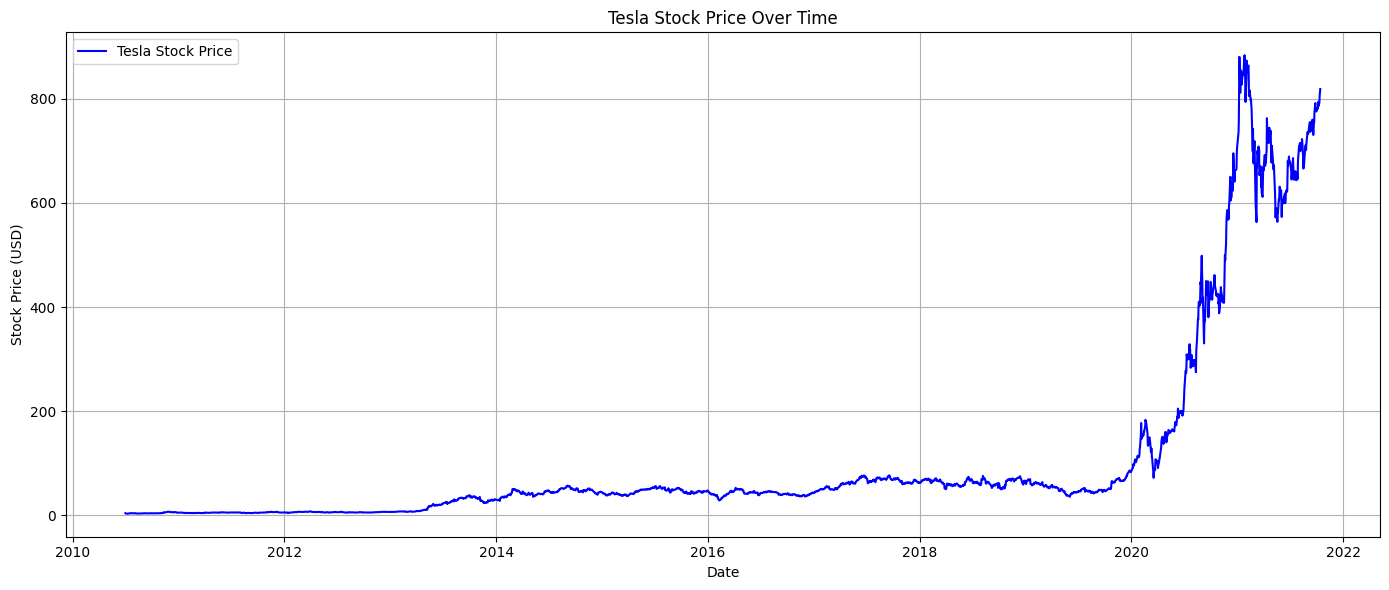

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Load Tesla stock data
tesla_data = pd.read_csv("TSLA.csv")
tesla_data["Date"] = pd.to_datetime(tesla_data["Date"])

# Plot stock graph only
plt.figure(figsize=(14,6))
plt.plot(tesla_data["Date"], tesla_data["Close"], label="Tesla Stock Price", color="blue")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.title("Tesla Stock Price Over Time")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [40]:

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Download GameStop data
gme = yf.Ticker("GME")
gamestop_data = gme.history(period="max")
gamestop_data.reset_index(inplace=True)


In [41]:
def make_graph(stock_data, stock, title):
    plt.figure(figsize=(14, 6))
    plt.plot(stock_data["Date"], stock_data["Close"], label=f"{stock} Stock Price", color="purple")
    plt.xlabel("Date")
    plt.ylabel("Stock Price (USD)")
    plt.title(title)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


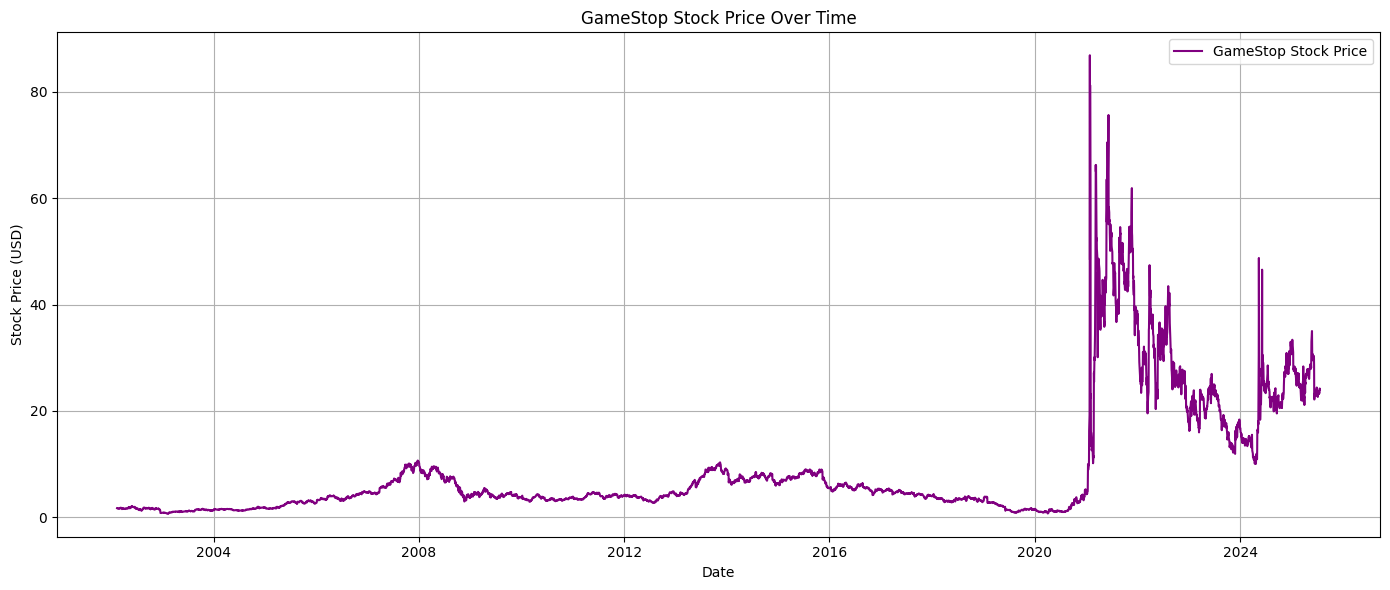

In [42]:
make_graph(gamestop_data, "GameStop", "GameStop Stock Price Over Time")


#Author


Muhammad Munawar Shahzad